### Deep Learning 기반의 손글씨 예측하기


https://www.tensorflow.org/tutorials/quickstart/beginner

- 데이터 로딩
- 0~9까지의 손글씨를 예측하기 위한 데이터 셋

In [26]:
from tensorflow.keras.datasets import mnist

# (train_images, train_labels) 훈련 데이터
# (test_images, test_labels) 검증 데이터
# load_data()는 훈련, 검증 데이터를 구분해서 반환
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
print(train_images.shape)  # 3차원의 feature
print(train_labels.shape)  #  target

(60000, 28, 28)
(60000,)


In [28]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
# 숫치화 되어 있는 tensor들로 1차원으로 가공해서 학습 및 검증 권장

print(test_images.shape)
print(test_labels.shape)  # 0~9까지의 숫자값을 보유한 target

(10000, 28, 28)
(10000,)


In [30]:
type(test_images[4])

numpy.ndarray

In [31]:
test_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 224,   0,
          0,   0,   0,   0,   0,   0,  70,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  

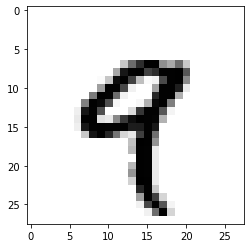

In [32]:
# test 데이터 - 10000개가 768 형식으로 펴져 있는 상태
digit = train_images[4]

# 데이터를 시각화 
# 흑백 표현하는 수치값은 0~255(0 흰색, 255는 흑색igit = train_images[4]

# 데이터를 시각화 
# 흑백 표현하는 수치값은 0~255(0 흰색, 255는 흑색)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary);  #흑백 따라서 binary로 하면 된다


In [33]:
# 훈련 데이터

print(train_images[0])  # 60000x28x28으로 구성되어 있음

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [46]:
len(train_images)

60000

In [47]:
28*28

784

In [48]:
type(train_images)

numpy.ndarray

In [34]:
# 열은 28*28 
# 가중치 곱해서 더하고 변환해야 함 - 값이 253등 크면 값이 너무 커서 가중치도 너무 크게 연산, 
# 따라서 스케일 조절 따라서 255로 나누기
# reshape(len(train_images), 28*28) -> reshape(60000, 784)
# float64 메모리를 float32로 변경후 row 60000, 784 컬럼으로 변경 후 255로 나눔 
train_images = train_images.astype('float32').reshape(len(train_images), 28*28)/255
test_images = test_images.astype('float32').reshape(len(test_images), 28*28)/255

print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [35]:
# 0~9까지 숫자 맞추기
# 연속적인 숫자로 보시면 안됨, 카테고리 데이터
# 카테고리 맞추기 학습 
# 카테고리 값들 전처리 - 원핫인코딩 형식


from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

딥러닝의 가장 큰 특징

은닉층이라는 새로운 학습 영역이 포함: 뇌속의 뉴런과 동일한 알고리즘의 개념
구현 관점 : 층(dense)
입력(입력층):자원 / 은닉(은닉층) : 어러겹 포함 / 출력(출력층):답


In [37]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

In [38]:
train_images.shape

(60000, 784)

In [39]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))  # 일반적으로 2의 제곱 권장, GPU가 조아함
model.add(Dense(10, activation='softmax'))  # 다중분류일때 사용, 이진분류일 경우 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
'''
categorical_crossentropy

다중 분류 손실 함수
출력 값이 one-hot encoding된 결과로 나온다. 

metrics=['accuracy'] 추가로 정확도 확인
'''


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
train_images.shape, train_labels.shape

((60000, 784), (60000, 10))

In [42]:
# 학습

model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4339 - accuracy: 0.8729
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9679
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0474 - accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0198 - accuracy: 0.9948
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9961
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0115 - accuracy: 0.9968
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9974

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9812


In [44]:
test_acc

0.9811999797821045